# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn import metrics, linear_model

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

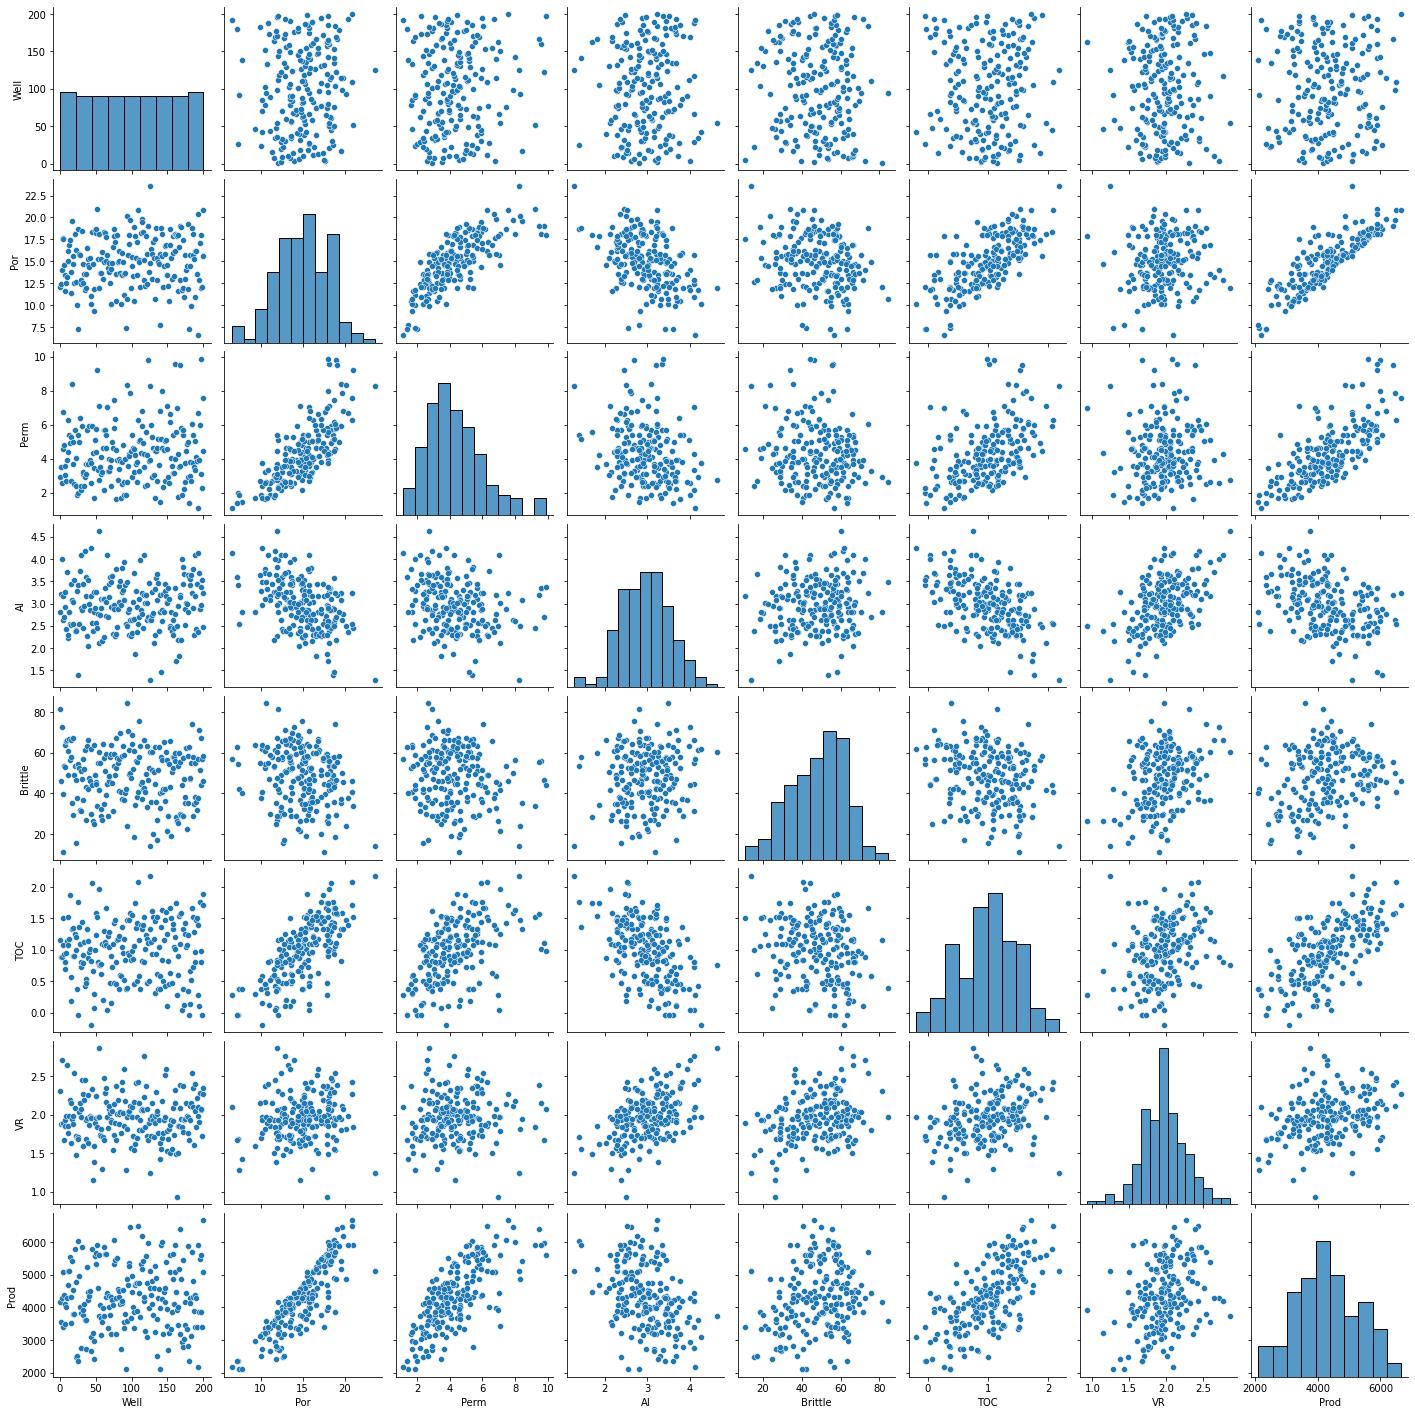

In [3]:
# Ваш код здесь
sns.pairplot(data)

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг корреляционной матрицы: 8
Опеределитель корреляционной матрицы: 0.0007


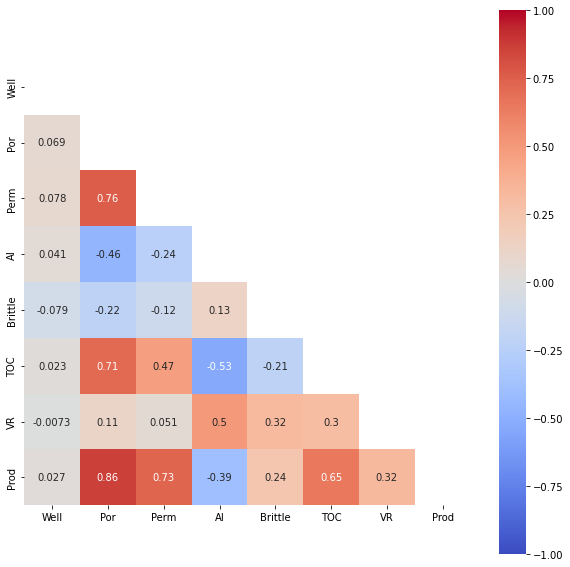

In [4]:
# Корреляционная матрица
plt.rcParams['figure.figsize'] = (10,10)
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, mask=np.triu(corr_matrix), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True)

# Ранг корреляционной матрицы
print(f'Ранг корреляционной матрицы: {np.linalg.matrix_rank(corr_matrix)}')

# Определитель корреляционной матрицы
print(f'Опеределитель корреляционной матрицы: {round(np.linalg.det(corr_matrix), 4)}')

> *Ваши выводы здесь*

Факторы, наиболее коррелирующий с целевой переменной, это Por, Perm и TOC.
В чистом виде коллениарности между факторами не наблюдается (ранг максимален), но есть сильная связь межу факторами Por и Perm, Por и ТОС.
Корреляционная матрица прохо обусловлена (ппределитель близок к нулю) поэтому метод МНК даст плохой результат.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [5]:
X = np.column_stack((np.ones(data.shape[0]), data.drop(columns='Prod')))
y = data['Prod']

w_hat = np.linalg.inv(X.T@X)@X.T@y
print(list(map(lambda x: round(x), w_hat)))

[-1232, 0, 230, 116, -365, 25, -78, 785]


> *Ваши выводы здесь*

На целевую переменную не оказывает влияние фактор Well, т. к. его коэффициент равен нулю. Полученные коэффциенты регересси показывают на сколько меняется целевой переменная Prod при изменении фактора на единицу. Так, напромер, при увеличении пористости скважины на 1% добыча газа в сутки должна увеличится на 230 млн. кубических футов. Или при увеличении коэффициента хрупкости скважины на 1% добыча должна вырасти на 25 млн. кубических футов в сутки.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [62]:
well_01 = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
well_01_prod_true = 4748.315024

# Оценка производительности новой скажины
well_01_vec = np.array(list(well_01.values()))
well_01_prod_pred = w_hat[1:]@well_01_vec + w_hat[0]

print(f'Оценка производительности новой скважины: {round(well_01_prod_pred)} млн. фт3/день')
print(f'AE прогноза: {round(abs(well_01_prod_true - well_01_prod_pred))}')

# Метрика MAPE для всех скважин
y_pred = X@w_hat
print(f'Метрика MAPE модели: {round(metrics.mean_absolute_percentage_error(y, y_pred)*100,1)}%')

Оценка производительности новой скважины: 4723 млн. фт3/день
AE прогноза: 25
Метрика MAPE модели: 3.6%


> *Ваши выводы здесь*

В среднем модель ошибается на 3.6% на тренировочном датасете. Это небольшая погрешность.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [63]:
# Ваш код здесь

> *Ваши выводы здесь*

У фактора TOC наблюдается ситуация при которой знак коэффициента корреляции между ним и целевой переменной противоречит коэффициенту модели. Это является следствием плохой обусловленности корреляционной матрицы наблюдейний, которая является следствием мультиколлинеарности данных. 

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [64]:
# Модель на обновленных данных
X_cuted = np.column_stack((np.ones(data.shape[0]), data.drop(columns=['Well', 'Perm', 'TOC', 'Prod']))) 

w02_hat = np.linalg.inv(X_cuted.T@X_cuted)@X_cuted.T@y
print(list(map(lambda x: round(x), w02_hat)))

# Метрика MAPE новой модели
y_pred_cuted = X_cuted@w02_hat
print(f'Метрика MAPE новой модели: {round(metrics.mean_absolute_percentage_error(y, y_pred_cuted)*100,1)}%')

[-1835, 293, -200, 28, 517]
Метрика MAPE новой модели: 4.0%


> *Ваши выводы здесь*

При изменении параметра Por на 1%, прирост производительности скважины увеличивается на 293 млн. фт3/сутки согласно новой модели. Это больше, чем мы получали в старой модели (до упразденения мультиколлениарности в факторах). Или при уменьшении параметра Brittl на 1% должно произойти падение добычи на 28 млн. фт3/сутки. Ранее пля этого признака был получен коэффициент 25.

После удления неинформативных признаков противоречия между знакоми корреляции и коэффициетами модели исчезли.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [110]:
# Модель линейной регрессии из библиотеки sklearn
X_train = data.drop(columns=['Well', 'Perm', 'TOC', 'Prod'])
y_train = data['Prod']

data_model = linear_model.LinearRegression(fit_intercept=True)
data_model.fit(X_train, y_train)

w03_hat = np.insert(data_model.coef_, 0, data_model.intercept_)
print(f'Коэффициенты новой модели: {list(map(lambda x: round(x), list(w03_hat)))}')

# Метрика MAPE модели
y_pred_cuted_sk = data_model.predict(X_train)
print(f'Предсказания новой модели: {y_pred_cuted_sk}')
metric_lr = round(metrics.mean_absolute_percentage_error(y, y_pred_cuted_sk)*100,1)
print(f'Метрика MAPE новой модели: {metric_lr}%')

Коэффициенты новой модели: [-1835, 293, -200, 28, 517]
Предсказания новой модели: [4589.52107225 3397.14399164 4890.39665689 4889.52732317 3947.90778624
 4229.90622767 4249.72393291 3371.37211174 4189.69700814 4506.11934873
 4732.69328972 4770.2808588  5400.06549123 5443.26761475 4394.09353209
 3517.90058824 5267.23070275 4010.17126685 4762.89618425 3774.24176357
 5548.3979881  4647.80840121 2585.76402238 2368.36068081 5713.97197141
 1990.15019761 4789.10952823 4020.06126188 2913.1663106  3797.30839332
 5573.4975885  3835.34899987 3904.1576923  4133.93418772 3734.07176821
 2665.06381221 3606.05790784 5324.50412304 4257.34163193 4697.54584428
 4063.19893616 4414.35579957 3013.79313665 2615.06305394 5468.55684394
 3319.84302638 2915.77056731 2383.33875541 5373.00889015 5259.1194018
 5386.87949561 5703.90936342 4643.91872457 3900.95809286 5229.79240286
 4024.33223198 3280.39617367 3830.77622349 3857.76893137 4022.63655099
 5776.55184868 3920.12880398 5423.66708717 4184.05798857 5677.42228

> *Ваши выводы здесь*

Сравнимая коэффициенты моделей, полученных с помощью матричных вычислений и объектов и методой библеотеки sklearn, можно увидеть что результаты идентичны. Это так же подтверждается равеством значений метрики MAPE.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [56]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [128]:
# Ваш код здесь

#Полиномиальные признаки
scaler_std = StandardScaler()
X_scaled = scaler_std.fit_transform(X_train)
polynominazer_3deg = PolynomialFeatures(degree=3, include_bias=False)
X_poly = polynominazer_3deg.fit_transform(X_scaled)
print(f'Количество признаков в датасете после полиномизации: {X_poly.shape[1]}')

#Обучение и оценка модели с помощью кросс-валидации
model_lr = LinearRegression()
results_cv_lr = cross_validate(model_lr, X_poly, y_train, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
metric_poly_lr_train = -results_cv_lr['train_score'].mean()*100
metric_poly_lr_test = -results_cv_lr['test_score'].mean()*100
print(f'MAPE на тренировочных фолдах: {metric_poly_lr_train:.2f}%')
print(f'MAPE на валидационных фолдах: {metric_poly_lr_test:.2f}%')

Количество признаков в датасете после полиномизации: 34
MAPE на тренировочных фолдах: 1.77%
MAPE на валидационных фолдах: 2.68%


> *Ваши выводы здесь*

Модель на полиномиальных признаках показала лучьшие результаты по сравнению с предыдуей моделью. Использование полинома 3-й степени не приводит к переобучению модели, т. к. ошибка предсказания между валидационными и проверочными выборками составляет менее одного процентных пункта.

Из более высокого показазания метрики полиномиальной модели, можно сделать вывод о том, что зависимость между факторами и целевой переменной носит нелинейный характер. 

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [126]:
# Ваш код здесь
import optuna

def optuna_lasso(trial):
  # задаем пространства поиска гиперпараметров
  alpha = trial.suggest_float('alpha', 0, 10, step = 0.1)

  # создаем модель
  model = Lasso(alpha=alpha, max_iter=10000)
  
  # обучаем модель и считаем метрику MAPE для проверочных фолдов
  results_cv = cross_validate(model, X_poly, y_train, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
  error = -results_cv['test_score'].mean()*100

  return error


# cоздаем объект исследования
study = optuna.create_study(study_name="Lasso regression", direction="minimize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_lasso, n_trials=50)
print("Наилучшие значения гиперпараметров {}".format(study.best_params))

#Оценка качества модели с оптимальными гиперпараметрами
model_lasso = Lasso(**study.best_params, max_iter=10000)
results_cv_lasso = cross_validate(model_lasso, X_poly, y_train, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

metric_poly_lasso_train = -results_cv_lasso['train_score'].mean()*100
metric_poly_lasso_test = -results_cv_lasso['test_score'].mean()*100
print(f'MAPE на тренировочных фолдах: {metric_poly_lasso_train:.2f}%')
print(f'MAPE на валидационных фолдах: {metric_poly_lasso_test:.2f}%')

[I 2023-05-03 00:00:07,721] A new study created in memory with name: Lasso regression
[I 2023-05-03 00:00:07,882] Trial 0 finished with value: 2.518782784718676 and parameters: {'alpha': 0.7000000000000001}. Best is trial 0 with value: 2.518782784718676.
[I 2023-05-03 00:00:07,922] Trial 1 finished with value: 2.476085607442747 and parameters: {'alpha': 1.0}. Best is trial 1 with value: 2.476085607442747.
[I 2023-05-03 00:00:07,987] Trial 2 finished with value: 2.6187816735526557 and parameters: {'alpha': 0.2}. Best is trial 1 with value: 2.476085607442747.
[I 2023-05-03 00:00:08,036] Trial 3 finished with value: 2.2825632122429758 and parameters: {'alpha': 4.1000000000000005}. Best is trial 3 with value: 2.2825632122429758.
[I 2023-05-03 00:00:08,107] Trial 4 finished with value: 2.3845124953328494 and parameters: {'alpha': 2.1}. Best is trial 3 with value: 2.2825632122429758.
[I 2023-05-03 00:00:08,219] Trial 5 finished with value: 2.2902725856876724 and parameters: {'alpha': 6.9}. B

Наилучшие значения гиперпараметров {'alpha': 4.6000000000000005}
MAPE на тренировочных фолдах: 1.82%
MAPE на валидационных фолдах: 2.28%


> *Ваши выводы здесь*

Используя регуляризацию, удалось повысить качество полиномиальной модели на валидационных фолдах на 0.4 процентных пункта (метрика MAPE). При этом MAPE на обучающих фолдах ожидаемо увеличилась на 0.05 процентных пункта. Это говорит о том, что регуляризация помогла уменьшить переобученность модели.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [132]:
# Ваш код здесь
def optuna_ridge(trial):
  # задаем пространства поиска гиперпараметров
  alpha = trial.suggest_float('alpha', 0, 10, step = 0.1)
  solver = trial.suggest_categorical('solver', ['svd', 'sag', 'saga'])

  # создаем модель
  model = Ridge(alpha=alpha, solver=solver, max_iter=10000)
  
  # обучаем модель и считаем метрику MAPE для проверочных фолдов
  results_cv = cross_validate(model, X_poly, y_train, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
  error = -results_cv['test_score'].mean()*100

  return error


# cоздаем объект исследования
study02 = optuna.create_study(study_name="Ridge regression", direction="minimize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study02.optimize(optuna_ridge, n_trials=50)
print("Наилучшие значения гиперпараметров {}".format(study02.best_params))

#Оценка качества модели с оптимальными гиперпараметрами
model_ridge = Ridge(**study02.best_params, max_iter=10000)
results_cv_ridge = cross_validate(model_ridge, X_poly, y_train, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

metric_poly_ridge_train = -results_cv_ridge['train_score'].mean()*100
metric_poly_ridge_test = -results_cv_ridge['test_score'].mean()*100
print(f'MAPE на тренировочных фолдах: {metric_poly_ridge_train:.2f}%')
print(f'MAPE на валидационных фолдах: {metric_poly_ridge_test:.2f}%')

[I 2023-05-03 00:08:50,055] A new study created in memory with name: Ridge regression
[I 2023-05-03 00:08:50,114] Trial 0 finished with value: 3.285209497506767 and parameters: {'alpha': 5.7, 'solver': 'svd'}. Best is trial 0 with value: 3.285209497506767.
[I 2023-05-03 00:08:50,339] Trial 1 finished with value: 5.035002710837573 and parameters: {'alpha': 2.1, 'solver': 'saga'}. Best is trial 0 with value: 3.285209497506767.
[I 2023-05-03 00:08:50,546] Trial 2 finished with value: 4.560815572565771 and parameters: {'alpha': 5.7, 'solver': 'sag'}. Best is trial 0 with value: 3.285209497506767.
[I 2023-05-03 00:08:50,692] Trial 3 finished with value: 5.195174218695799 and parameters: {'alpha': 5.2, 'solver': 'saga'}. Best is trial 0 with value: 3.285209497506767.
[I 2023-05-03 00:08:50,811] Trial 4 finished with value: 4.267985514793889 and parameters: {'alpha': 1.9000000000000001, 'solver': 'sag'}. Best is trial 0 with value: 3.285209497506767.
[I 2023-05-03 00:08:50,923] Trial 5 finish

Наилучшие значения гиперпараметров {'alpha': 0.1, 'solver': 'svd'}
MAPE на тренировочных фолдах: 1.77%
MAPE на валидационных фолдах: 2.67%


> *Ваши выводы здесь*

При помощи L2 регуляризации не удалось добиться существенного положительного изменения в качестве модели по метрике MAPE на проверочных фолдах, зато на тестовых метрика выше, что говорит о том, что L2 регуляризация справляется в данном случае хуже чем L1.  

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [136]:
# Ваш код здесь
def optuna_elasticnet(trial):
  # задаем пространства поиска гиперпараметров
  alpha = trial.suggest_float('alpha', 0, 10, step = 0.1)
  l1_ratio = trial.suggest_float('l1_ratio', 0, 1, step = 0.01)

  # создаем модель
  model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
  
  # обучаем модель и считаем метрику MAPE для проверочных фолдов
  results_cv = cross_validate(model, X_poly, y_train, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
  error = -results_cv['test_score'].mean()*100

  return error

# cоздаем объект исследования
study03 = optuna.create_study(study_name="ElasticNet regression", direction="minimize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study03.optimize(optuna_elasticnet, n_trials=50)
print("Наилучшие значения гиперпараметров {}".format(study03.best_params))

#Оценка качества модели с оптимальными гиперпараметрами
model_elasticnet = ElasticNet(**study03.best_params, max_iter=10000)
results_cv_elasticnet = cross_validate(model_elasticnet, X_poly, y_train, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

print('MAPE на тренировочных фолдах: {:.2f} %'.format(-results_cv_elasticnet['train_score'].mean()*100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-results_cv_elasticnet['test_score'].mean()*100))

metric_poly_elasticnet_train = -results_cv_elasticnet['train_score'].mean()*100
metric_poly_elasticnet_test = -results_cv_elasticnet['test_score'].mean()*100
print(f'MAPE на тренировочных фолдах: {metric_poly_elasticnet_train:.2f}%')
print(f'MAPE на валидационных фолдах: {metric_poly_elasticnet_test:.2f}%')

[I 2023-05-03 00:12:54,799] A new study created in memory with name: ElasticNet regression
[I 2023-05-03 00:12:54,843] Trial 0 finished with value: 10.615491565021857 and parameters: {'alpha': 5.5, 'l1_ratio': 0.58}. Best is trial 0 with value: 10.615491565021857.
[I 2023-05-03 00:12:54,862] Trial 1 finished with value: 11.642458743875409 and parameters: {'alpha': 5.300000000000001, 'l1_ratio': 0.24}. Best is trial 0 with value: 10.615491565021857.
[I 2023-05-03 00:12:54,884] Trial 2 finished with value: 10.708994873615959 and parameters: {'alpha': 3.8000000000000003, 'l1_ratio': 0.35000000000000003}. Best is trial 0 with value: 10.615491565021857.
[I 2023-05-03 00:12:54,907] Trial 3 finished with value: 11.319179051385682 and parameters: {'alpha': 7.7, 'l1_ratio': 0.5700000000000001}. Best is trial 0 with value: 10.615491565021857.
[I 2023-05-03 00:12:54,936] Trial 4 finished with value: 6.844748516435225 and parameters: {'alpha': 1.1, 'l1_ratio': 0.65}. Best is trial 4 with value: 6.

Наилучшие значения гиперпараметров {'alpha': 1.8, 'l1_ratio': 1.0}
MAPE на тренировочных фолдах: 1.79 %
MAPE на валидационных фолдах: 2.41 %
MAPE на тренировочных фолдах: 1.79%
MAPE на валидационных фолдах: 2.41%


> *Ваши выводы здесь*

Получены результаы, стравнимые с L1 ругуляризацией. Выбор оптимизатором значения l1_ratio равным 1 говорит о том что L1 регуляризация дает лучшие результаты.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [137]:
# Ваш код здесь

summary = pd.DataFrame(
    [['Линейная регрессия', np.nan, False, metric_lr, np.nan],
    ['Линейная регрессия', np.nan, True, metric_poly_lr_train, metric_poly_lr_test],
    ['Регуляризация Лассо', study.best_params, True, metric_poly_lasso_train, metric_poly_lasso_test],
    ['Регуляризация Ридж', study02.best_params, True, metric_poly_ridge_train, metric_poly_ridge_test],
    ['Регуляризация эластичная сетка', study03.best_params, True, metric_poly_elasticnet_train, metric_poly_elasticnet_test]],
    columns=['Модель', 'Гиперпараметры', 'Полиномиальность', 'Метрика на обучении, %', 'Метрика на проверке, %'])

display(summary)

,Модель,Гиперпараметры,Полиномиальность,"Метрика на обучении, %","Метрика на проверке, %"
0,Линейная регрессия,NaN,False,4.000000,NaN
1,Линейная регрессия,NaN,True,1.773240,2.680875
2,Регуляризация Лассо,{'alpha': 4.6000000000000005},True,1.821413,2.275531
3,Регуляризация Ридж,"{'alpha': 0.1, 'solver': 'svd'}",True,1.772072,2.672864
4,Регуляризация эластичная сетка,"{'alpha': 1.8, 'l1_ratio': 1.0}",True,1.791039,2.409432


> *Ваши выводы здесь*

В работе сравнивались модели линейной регресси для оценки параметра производительеости скважин по добыче газа. Часть моделей была постороена с использованием полиномиальных признаков. Использовался полинов 3-й степени. К моделям применялись разные виды регуляризации для уменьшения влияния переобучения полиномиальных моделей. Для оценки качества моделей использовалась метрика MAPE. Наиболее результативной оказалась модель линейной регресии, с сипользованием полинома 3-й степени и с применением регуляризации Лассо. Метрика этой модели на проверочных фолдах составила 2.28%. Данная модель рекомендуется клиенту для оценки производительности новых скважин.